In [1]:
!pip install -r requirments.txt

### 1. Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### 2. Basic Processing

In [3]:
df = pd.read_csv('data/processed/ChurnModelling_imputed.csv')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.00,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35.00,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36.00,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42.00,3,75075.31,2,1,0,92888.52,1


In [4]:
print(f"No of Rows {len(df)}")

No of Rows 10000


### 3. Outlier Detection Techniques

#### 3.1 Distribution Plot

In [5]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=="Male" else 0)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,0,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43.00,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39.00,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35.00,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36.00,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42.00,3,75075.31,2,1,0,92888.52,1


In [6]:
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

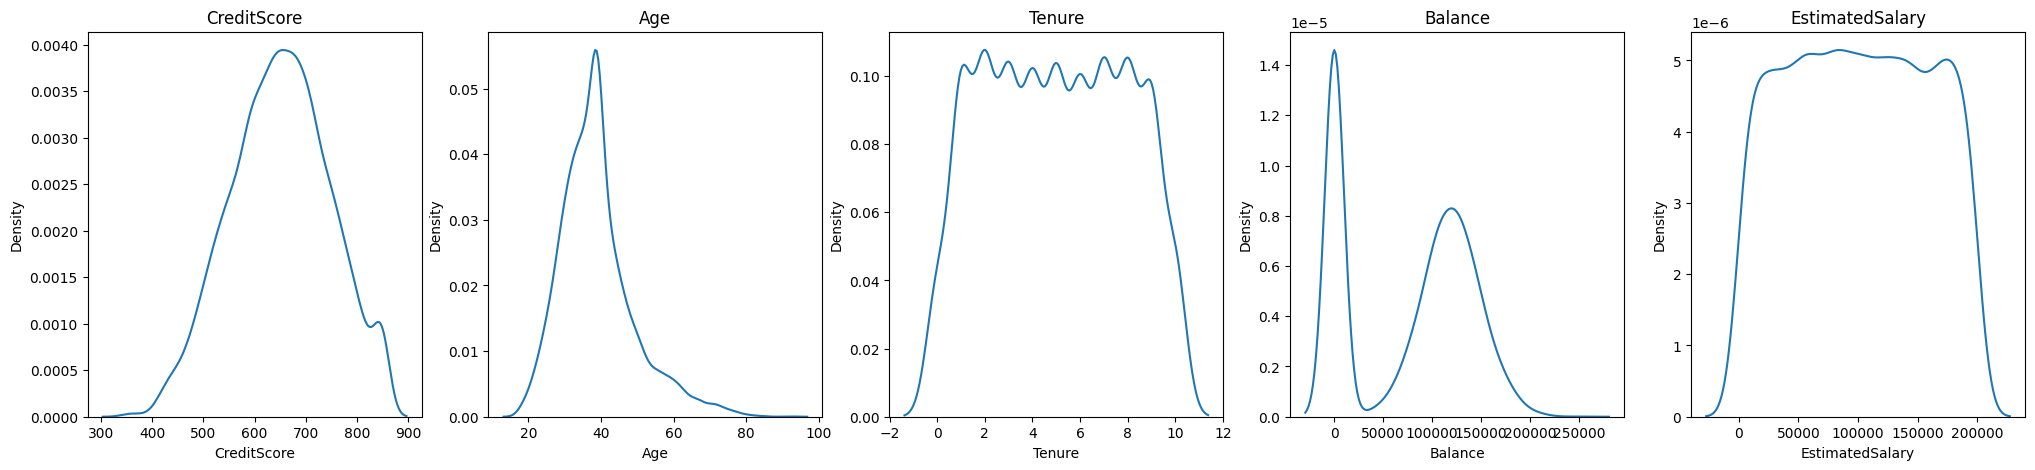

In [7]:
fig, axes = plt.subplots(1,5 , figsize=(25, 5))

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.show()

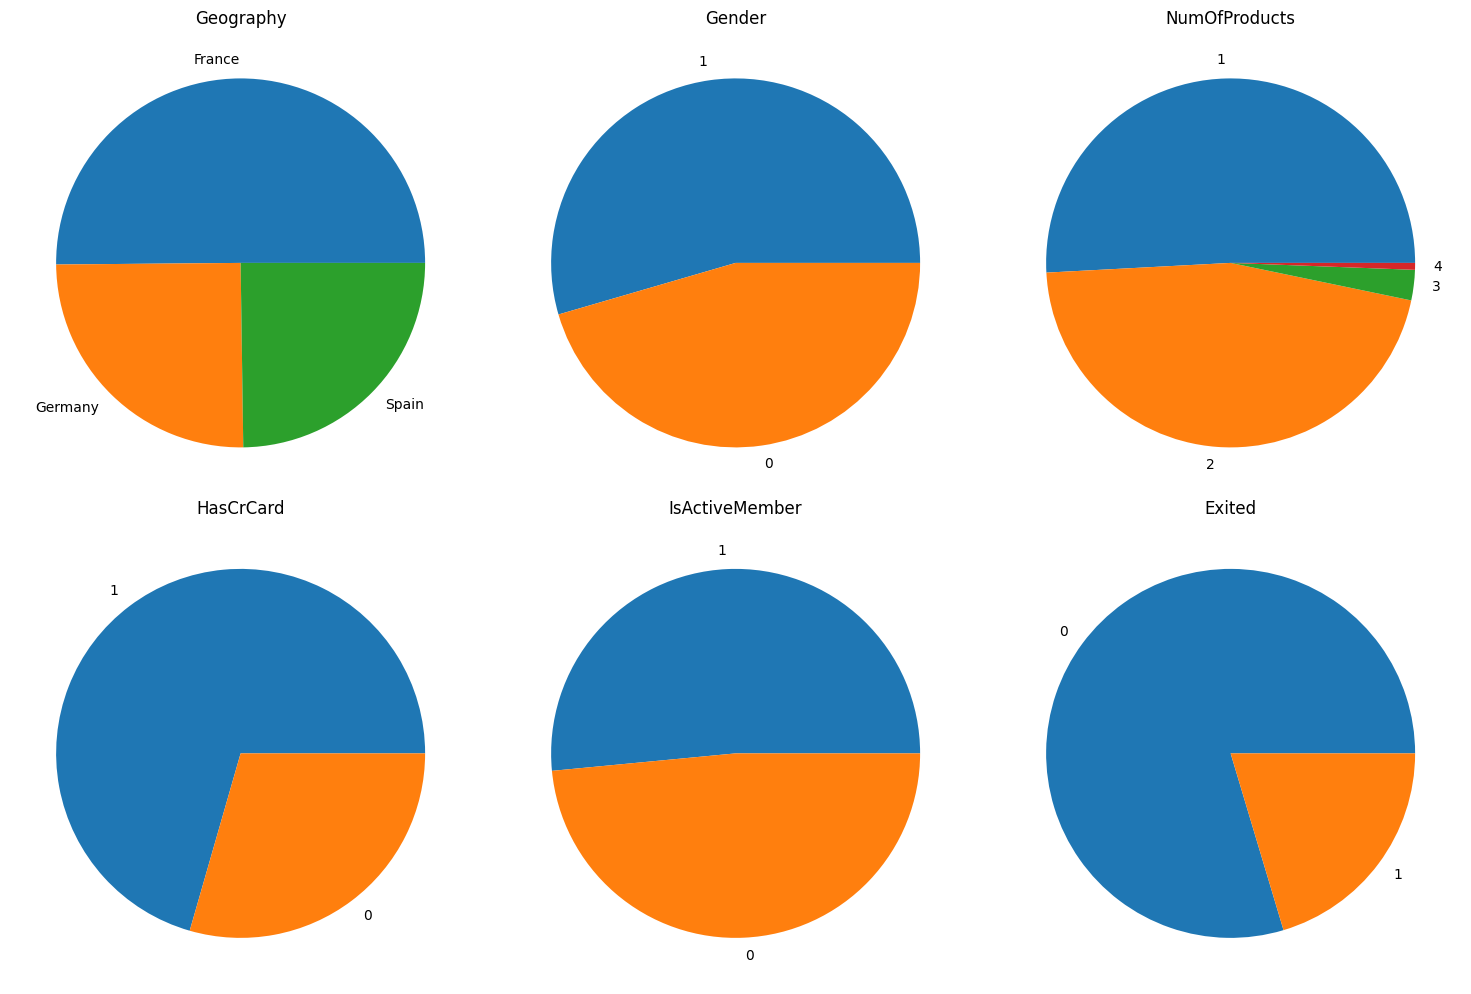

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array to 1D for easier indexing

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
                            kind='pie',
                            ax=axes[idx]
                            )
    axes[idx].set_title(col)
    axes[idx].set_ylabel('')

plt.tight_layout()  # Add this for better spacing
plt.show()

#### 3.2 Box Plots

<Axes: ylabel='NumOfProducts'>

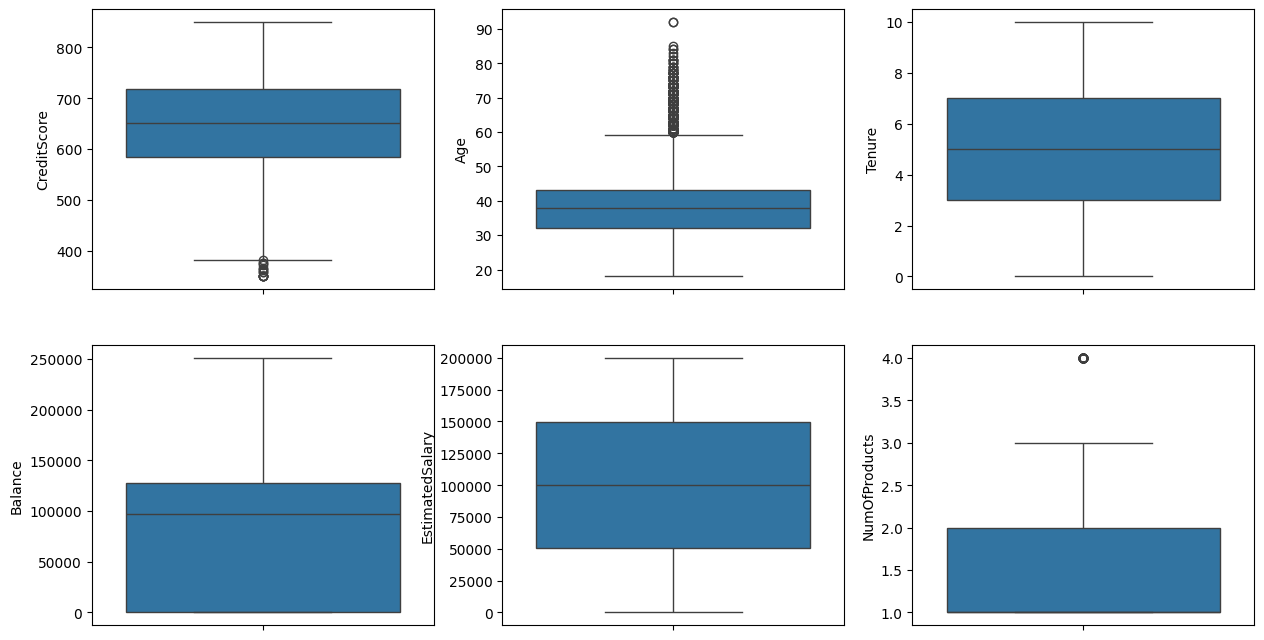

In [9]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(data=df['CreditScore'], ax=axes[0, 0])
sns.boxplot(data=df['Age'], ax=axes[0, 1])
sns.boxplot(data=df['Tenure'], ax=axes[0, 2])
sns.boxplot(data=df['Balance'], ax=axes[1, 0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1, 1])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1, 2])

#### 3.3 Emperical Rule / 3-Sigma Rule

In [10]:
def find_anomaly(data):

    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)

    return (data > upper_bound) | (data < lower_bound)

In [11]:
numerical_columns = [ 'Age', 'Tenure','CreditScore', 'Balance', 'EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentages = round(n_outliers/ len(df), 4)
    print(f"{col} has {n_outliers} outliers ({n_outliers_percentages*100}%)")

Age has 144 outliers (1.44%)
Tenure has 0 outliers (0.0%)
CreditScore has 8 outliers (0.08%)
Balance has 0 outliers (0.0%)
EstimatedSalary has 0 outliers (0.0%)


#### 3.4 IQR Method

In [12]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    return (data > upper_bound) | (data < lower_bound)


In [13]:
numerical_columns = [ 'Age', 'Tenure','CreditScore', 'Balance', 'EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentages = round(n_outliers/ len(df), 4)
    print(f"{col} has {n_outliers} outliers ({n_outliers_percentages*100}%)")

Age has 501 outliers (5.01%)
Tenure has 0 outliers (0.0%)
CreditScore has 15 outliers (0.15%)
Balance has 0 outliers (0.0%)
EstimatedSalary has 0 outliers (0.0%)


In [14]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]

outlier_mask_log

,Age,Tenure,CreditScore,Balance,EstimatedSalary,Outlier Count
8762,True,False,True,False,False,2


In [15]:
df['Gender'] = df['Gender'].apply(lambda x: "Male" if x==1 else "Female")

In [16]:
df.to_csv('data/processed/ChurnModelling_Outlier_Handled.csv', index=False)